In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
from cat_analysis.io import (read_trip_file_names,
                            CleanTrip)

In [3]:
files = read_trip_file_names('/home/tom/Documents/code/cats_data')

In [4]:
ct = CleanTrip(files[1])

In [5]:
ct.clean()

In [27]:
r_ts = ct.resample(rule='120s')

In [34]:
r_ts.iloc[20:100]

,catsid,hr_0002-4182,spo2_0002-4bb8,nbps_0002-4a05,nbpd_0002-4a06,nbpm_0002-4a07,abps_0002-4a15,abpd_0002-4a16,abpm_0002-4a17,arts_0002-4a11,...,trect_0002-e004,tcore_0002-4b60,tskin_0002-4b74,tesoph_0002-4b64,tnaso_0002-4b6c,co2_0002-50b0,wecgi,wecgiii,wabp,wcvp
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-10-07 17:16:00,1.966667,100.573171,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,100.658537,...,NaN,NaN,NaN,37.995122,NaN,3.910976,NaN,NaN,NaN,NaN
2016-10-07 17:18:00,1.991525,100.557692,99.998077,NaN,NaN,NaN,NaN,NaN,NaN,99.846154,...,NaN,NaN,NaN,37.955192,NaN,4.025000,NaN,NaN,NaN,NaN
2016-10-07 17:20:00,1.974790,100.035088,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,98.964912,...,NaN,NaN,NaN,37.936754,NaN,4.224561,NaN,NaN,NaN,NaN
2016-10-07 17:22:00,1.966667,100.304348,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,96.600000,...,NaN,NaN,NaN,37.906261,NaN,4.353913,NaN,NaN,NaN,NaN
2016-10-07 17:24:00,1.974790,99.959184,99.998980,NaN,NaN,NaN,NaN,NaN,NaN,96.897959,...,NaN,NaN,NaN,37.874082,NaN,4.405102,NaN,NaN,NaN,NaN
2016-10-07 17:26:00,1.966667,100.032258,99.970968,NaN,NaN,NaN,NaN,NaN,NaN,94.129032,...,NaN,NaN,NaN,37.820323,NaN,4.522581,NaN,NaN,NaN,NaN
2016-10-07 17:28:00,1.974790,100.219298,99.985088,NaN,NaN,NaN,NaN,NaN,NaN,95.342105,...,NaN,NaN,NaN,37.795439,NaN,4.557018,NaN,NaN,NaN,NaN
2016-10-07 17:30:00,1.975000,100.586207,99.728448,NaN,NaN,NaN,NaN,NaN,NaN,96.137931,...,NaN,NaN,NaN,37.758362,NaN,4.550862,NaN,NaN,NaN,NaN
2016-10-07 17:32:00,1.966667,100.912281,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,92.842105,...,NaN,NaN,NaN,37.720702,NaN,4.579825,NaN,NaN,NaN,NaN


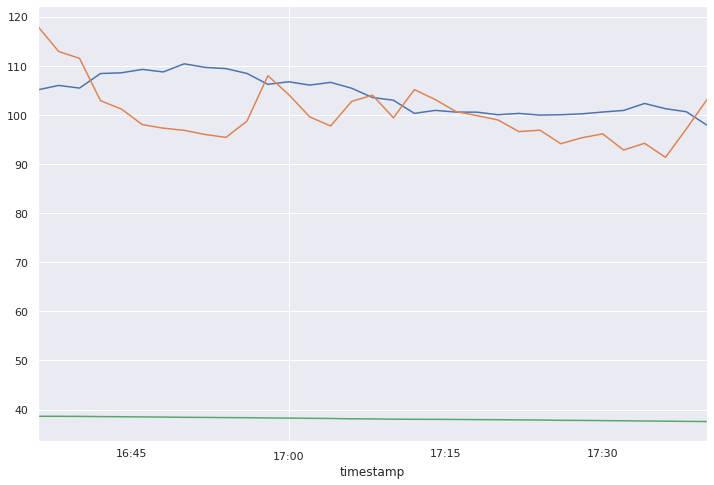

In [29]:
r_ts['hr_0002-4182'].plot.line(figsize=(12,8))
r_ts['arts_0002-4a11'].plot.line(figsize=(12,8))
r_ts['tesoph_0002-4b64'].plot.line(figsize=(12,8))

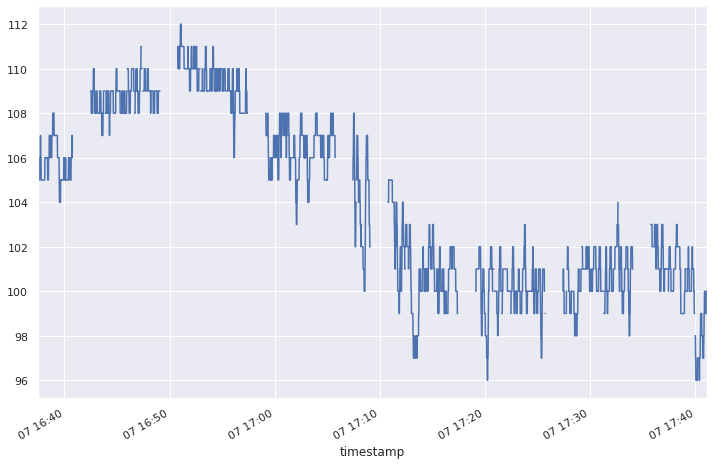

In [8]:
ct.time_series['hr_0002-4182'].plot(figsize=(12,8))

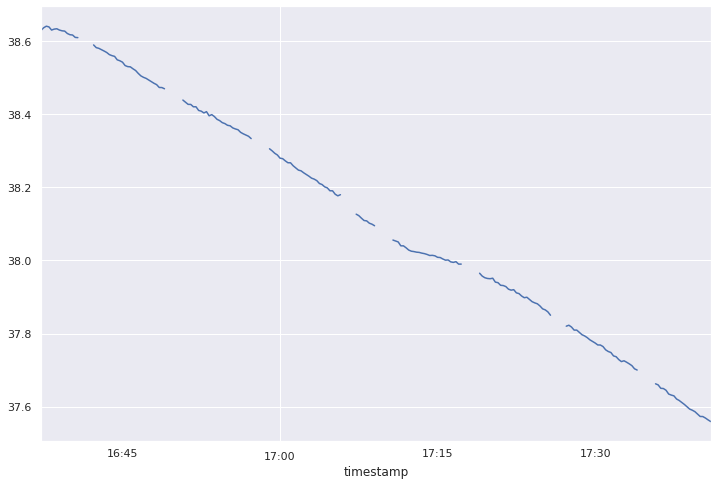

In [22]:
r_ts['tesoph_0002-4b64'].plot.line(figsize=(12,8))
